In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [4]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    results[name] = {
        "model": model,
        "accuracy": acc,
        "y_pred": y_pred
    }


Model: Logistic Regression
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model: KNN
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model: Random Forest
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      seto

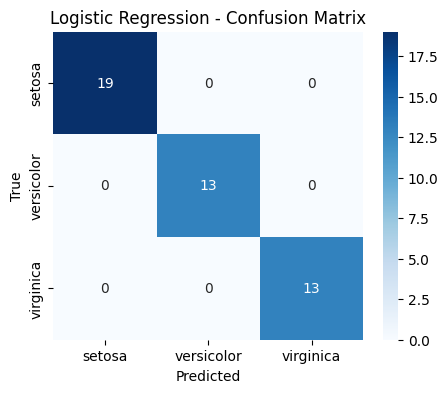

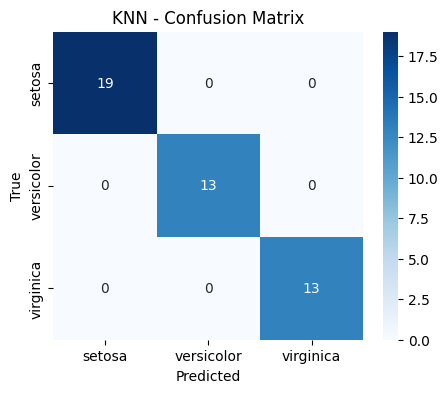

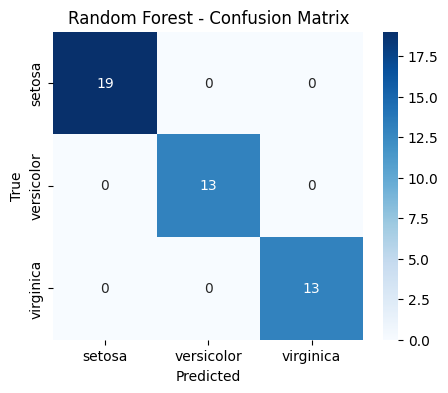

In [5]:
for name in results:
    cm = confusion_matrix(y_test, results[name]['y_pred'])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [6]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - Cross Validation Mean Accuracy: {scores.mean():.4f}")

Logistic Regression - Cross Validation Mean Accuracy: 0.9733
KNN - Cross Validation Mean Accuracy: 0.9733
Random Forest - Cross Validation Mean Accuracy: 0.9600


/tmp/ipykernel_6772/2815394550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")


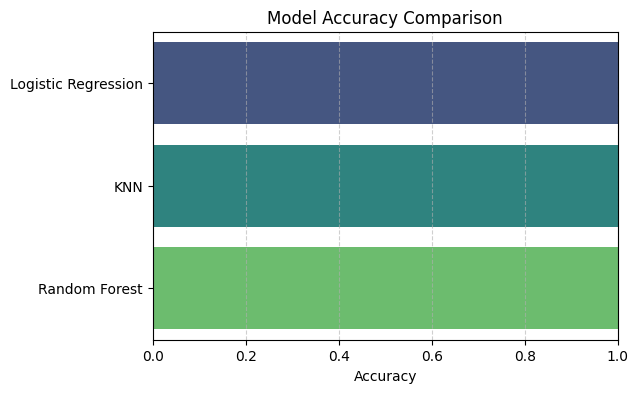

In [7]:
import matplotlib.pyplot as plt

# Collect accuracies
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=accuracies, y=model_names, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [8]:
# Example for Random Forest
model = results["Random Forest"]["model"]
y_pred = results["Random Forest"]["y_pred"]

misclassified_indices = np.where(y_pred != y_test)[0]

print(f"Total misclassified samples: {len(misclassified_indices)}\n")

for i in misclassified_indices:
    print(f"Index: {i}, True: {iris.target_names[y_test[i]]}, Predicted: {iris.target_names[y_pred[i]]}, Features: {X_test[i]}")

Total misclassified samples: 0

